In [42]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(context='notebook', style='darkgrid',palette='dark', font_scale=1.2)
%matplotlib inline

# ----- sk-learn dependecies -------
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [43]:
sonar=pd.read_csv("./sonar data.csv",header=None)
sonar.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [44]:
# Checking for any Null-values
sonar.isnull().sum()

0     0
1     0
2     0
3     0
4     0
     ..
56    0
57    0
58    0
59    0
60    0
Length: 61, dtype: int64

c:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='60', ylabel='count'>

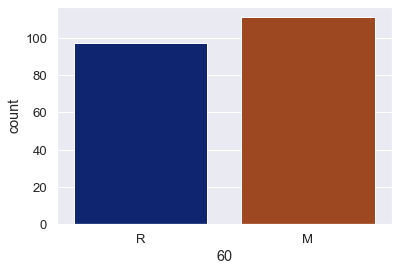

In [45]:
# Checking quality of data : Making Sure we have similar no of records for rocks and mine
sns.countplot(sonar[60])

`Findig the Mean value for each col grouping them by their Nature i.e Rock or Mine`

In [46]:
sonar.groupby(sonar[60]).mean()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
60,,,,,,,,,,,,,,,,,,,,,
M,0.034989,0.045544,0.050720,0.064768,0.086715,0.111864,0.128359,0.149832,0.213492,0.251022,...,0.019352,0.016014,0.011643,0.012185,0.009923,0.008914,0.007825,0.009060,0.008695,0.006930
R,0.022498,0.030303,0.035951,0.041447,0.062028,0.096224,0.114180,0.117596,0.137392,0.159325,...,0.012311,0.010453,0.009640,0.009518,0.008567,0.007430,0.007814,0.006677,0.007078,0.006024


`Training Our Model`

In [47]:
# Dividing DataSet into Input and OutPut data
X=sonar.drop(columns=60,axis=1).values
y=sonar[60].values

In [48]:
# Dividing input and output into training and testing data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=69)

In [49]:
# Fitting our Data into a Logistic Regression Model and Getting Predictions Corresponding to test_data
# Logistic Regression Model is prefered as it works well in Binary Classification Problems
model=LogisticRegression()
model.fit(X_train, y_train)
y_pred=model.predict(X_test)

In [50]:
# Checking The Accuracy Score
accuracy=accuracy_score(y_test,y_pred)
print(f"Model is {accuracy*100}% accurate\n:)")

Model is 80.95238095238095% accurate
:)


`Defining a Predictor-function that can take an input and can generate output corres to data`

In [67]:
def predict_rock_or_mine(inputRow):
    inputRow = np.array(inputRow).reshape(1, -1)
    prediction=model.predict(inputRow)
    if(prediction=='R'):
        print("It might be a Rock :)")
    else:
        print("There is a chance that it will be a MINE :{")


In [64]:
rock_input = (0.0260, 0.0192, 0.0254, 0.0061, 0.0352, 0.0701, 0.1263, 0.1080, 0.1523, 0.1630, 0.1030, 0.2187, 0.1542, 0.2630, 0.2940, 0.2978, 0.0699, 0.1401, 0.2990, 0.3915, 0.3598, 0.2403, 0.4208, 0.5675, 0.6094, 0.6323, 0.6549, 0.7673, 1.0000,
              0.8463, 0.5509, 0.4444, 0.5169, 0.4268, 0.1802, 0.0791, 0.0535, 0.1906, 0.2561, 0.2153, 0.2769, 0.2841, 0.1733, 0.0815, 0.0335, 0.0933, 0.1018, 0.0309, 0.0208, 0.0318, 0.0132, 0.0118, 0.0120, 0.0051, 0.0070, 0.0015, 0.0035, 0.0008, 0.0044, 0.0077)


mine_input = (0.0307, 0.0523, 0.0653, 0.0521, 0.0611, 0.0577, 0.0665, 0.0664, 0.1460, 0.2792, 0.3877, 0.4992, 0.4981, 0.4972, 0.5607, 0.7339, 0.8230, 0.9173, 0.9975, 0.9911, 0.8240, 0.6498, 0.5980, 0.4862, 0.3150, 0.1543, 0.0989, 0.0284, 0.1008, 0.2636,
              0.2694, 0.2930, 0.2925, 0.3998, 0.3660, 0.3172, 0.4609, 0.4374, 0.1820, 0.3376, 0.6202, 0.4448, 0.1863, 0.1420, 0.0589, 0.0576, 0.0672, 0.0269, 0.0245, 0.0190, 0.0063, 0.0321, 0.0189, 0.0137, 0.0277, 0.0152, 0.0052, 0.0121, 0.0124, 0.0055)


In [68]:
predict_rock_or_mine(rock_input)
predict_rock_or_mine(mine_input)

It might be a Rock :)
There is a chance that it will be a MINE :{


`Hence We can see that Model can Predict Rock or Mine with 80% of accuracy`